In [9]:
# АЛГОРИТМ (Полный перебор)
import time
import itertools

import random

def exhaustive_research(automata, n):
    start_time = time.time()
    alphabet = list(automata.alphabet.keys())
    max_result = float('-inf')  # Начальное значение для максимального результата
    max_word = None  # Переменная для хранения слова, дающего максимальный результат
    
    # Генерируем все возможные комбинации слов длины n из алфавита
    word_combinations = itertools.product(alphabet, repeat=n)
    
    # Перебираем все комбинации слов
    for word in word_combinations:
        # Преобразуем слово из кортежа в строку
        word_str = ''.join(word)
        # Вычисляем результат для текущего слова с помощью функции func
        result = automata.word_expectation(word_str)[1]
        # Если результат больше максимального, обновляем максимальный результат и слово
        if result > max_result:
            max_result = result
            max_word = word_str
    run_time = time.time() - start_time
    return (max_word, max_result, run_time)


# exhaustive_research ТЕСТ
# exhaustive_research ТЕСТ
# exhaustive_research ТЕСТ

# print(exhaustive_research(automata, 10))

###############################

def generate_random_word(alphabet, n):
    random_word = ''.join(random.choice(alphabet) for _ in range(n))
    return random_word

def elite_algorithm(automata, n, k, iterations, number_of_words):
    start_time = time.time()
    alphabet = list(automata.alphabet.keys())
    words_massive = []
    
    num_selected = int(number_of_words * (1 - k))
    num_replace = number_of_words - num_selected
    
    for j in range(number_of_words):
        words_massive.append(generate_random_word(alphabet, n))
        
    for i in range(iterations):
        func_results = {word: automata.word_expectation(word)[1] for word in words_massive}
        sorted_words = sorted(words_massive, key=lambda x: func_results[x], reverse=True)
        selected_words = sorted_words[:num_selected]

        words_to_replace = []
        for j in range(num_replace):
            words_to_replace.append(generate_random_word(alphabet, n))
        words_massive = selected_words + words_to_replace
    
    func_results = {word: automata.word_expectation(word)[1] for word in words_massive}
    sorted_words = sorted(words_massive, key=lambda x: func_results[x], reverse=True)
    run_time = time.time() - start_time
    return (sorted_words[0], automata.word_expectation(sorted_words[0])[1], run_time)
    
# print(elite_algorithm(automata, 9, 0.5, 1000, 10))

#############################################


# Параметры генетического алгоритма
population_size = 10 # Размер популяции
word_length = 9      # Длина каждого слова
generations = 1000    # Количество поколений
mutation_rate = 0.1   # Вероятность мутации
how_many_from_old_population = 6
#word_expectation - value слова
def fitness(automata, word):
    return automata.word_expectation(word)[1]

# функция создания популяции
def initialize_population(size, length, alphabet):
    return [''.join(random.choice(alphabet) for _ in range(length)) for _ in range(size)]

def select_pair(population):
    return random.sample(population, 2)

def crossover_vol1(word1, word2):
    point = random.randint(1, len(word1) - 1)
    new_word1 = word1[:point] + word2[point:]
    new_word2 = word2[:point] + word1[point:]
    return new_word1, new_word2

def mutate_vol1(word, mutation_rate, alphabet):
    if random.random() < mutation_rate:
        index = random.randint(0, len(word) - 1)
        new_char = random.choice(alphabet)
        word = word[:index] + new_char + word[index + 1:]
    return word

### Алгоритм с кроссоверами. Вариант 1
def evolutionary(automata, population_size, word_length, alphabet, generations, mutation_rate, how_many_from_old_population):
    
    population = initialize_population(population_size, word_length, alphabet)
    start_time = time.time()
    for generation in range(generations):
        # Оцениваем популяцию
        scored_population = [(word, fitness(automata, word)) for word in population]
        scored_population.sort(key=lambda x: x[1], reverse=True)
    
        # Сохраняем лучшие результаты
        new_population = [word for word, score in scored_population[:how_many_from_old_population]]
    
        # Кроссовер и мутация для заполнения оставшейся части популяции
        while len(new_population) < population_size:
            parent1, parent2 = select_pair(population)
            child1, child2 = crossover_vol1(parent1, parent2)
            new_population.extend([mutate_vol1(child1, mutation_rate, alphabet), mutate_vol1(child2, mutation_rate, alphabet)])
    
        population = new_population
    
        # Выводим лучший результат каждого поколения
        # print(f'Generation {generation + 1}: Best Score = {scored_population[0][1]}, Word = {scored_population[0][0]}')
        
    run_time = time.time() - start_time
    # print(select_pair(new_population))
    return(scored_population[0][0], scored_population[0][1], run_time)
    

###############################################################

# Параметры генетического алгоритма
population_size = 10 # Размер популяции
word_length = 8      # Длина каждого слова
generations = 1000    # Количество поколений
mutation_rate = 0.1   # Вероятность мутации
how_many_from_old_population = 6

num_func_crossover = 2
num_func_mutate = 1
#word_expectation - value слова
def fitness(automata, word):
    return automata.word_expectation(word)[1]

# функция создания популяции
def initialize_population(size, length, alphabet):
    return [''.join(random.choice(alphabet) for _ in range(length)) for _ in range(size)]

def select_pair(population):
    return random.sample(population, 2)

# def crossover1(word1, word2, automata, word_length):
#     score1 = fitness(automata, word1)
#     score2 = fitness(automata, word2)
#     point = random.randint(0, word_length - 1)
#     if (score1 > score2):
#         point = random.randint(0, word_length - 1)

def crossover1(word1, word2, word_length): # обмен экспертизой
    point = random.randint(0, word_length - 1)
    list1 = list(word1)
    list2 = list(word2)
    letter1 = list1[point]
    letter2 = list2[point]
    list1[point] = letter2
    list2[point] = letter1
    child1 = ''.join(list1)
    child2 = ''.join(list2)
    return child1, child2

# def crossover2(word1, word2, word_length): # апробация новой стратегии
#     point = random.randint(1, len(word1) - 1)
#     new_word1 = word1[:point] + word2[point:]
#     new_word2 = word2[:point] + word1[point:]
#     return new_word1, new_word2

def crossover3(word1, word2, word_length):
    cp1 = list(word1)
    cp2 = list(word2)
    child1 = []
    child2 = []
    for i in range(word_length):
        if (i % 2 == 0):
            child2.append(word1[i])
            child1.append(word2[i])
        else:
            child2.append(word2[i])
            child1.append(word1[i])

    return1 = ''.join(child1)
    return2 = ''.join(child2)
    return return1, return2
        
def crossover_vol2(word1, word2, word_length):
    seq = [i + 1 for i in range(num_func_crossover)]
    dice = random.choice(seq)
    
    if (dice == 1):
        return crossover1(word1, word2, word_length)
    elif (dice == 2):
        return crossover3(word1, word2, word_length)
    # elif (dice == 3):
    #     return crossover3(word1, word2, word_length)

def mutate1(word, mutation_rate, alphabet, index, special_symbol):
    if random.random() < mutation_rate:
        index = random.randint(0, len(word) - 1)
        new_char = random.choice(alphabet)
        word = word[:index] + new_char + word[index + 1:]
    return word
# def mutate2(word, mutation_rate, alphabet, index, special_symbol):
#     if random.random() < mutation_rate:
#         list_word = list(word)
#         list_word[index] = special_symbol
#         word = ''.join(list_word)
#     return word
        
def mutate_vol2(word, mutation_rate, alphabet, index, special_symbol):
    seq = [i + 1 for i in range(num_func_mutate)]
    dice = random.choice(seq)
    if (dice == 1):
        # return mutate1(word, mutation_rate, alphabet)
        return mutate1(word, mutation_rate, alphabet, index, special_symbol)
    # if (dice == 2):
    #     return mutate2(word, mutation_rate, alphabet, index, special_symbol)

def evolutionary_vol2(automata, population_size, word_length, alphabet, generations, mutation_rate, how_many_from_old_population):
    
    population = initialize_population(population_size, word_length, alphabet)
    start_time = time.time()
    for generation in range(generations):
        # Оцениваем популяцию
        scored_population = [(word, fitness(automata, word)) for word in population]
        scored_population.sort(key=lambda x: x[1], reverse=True)
    
        # Сохраняем лучшие результаты
        new_population = [word for word, score in scored_population[:how_many_from_old_population]]
    
        # Кроссовер и мутация для заполнения оставшейся части популяции
        while len(new_population) < population_size:
            index = random.randint(0, word_length - 1)
            special_symbol = scored_population[0][0][index]
            parent1, parent2 = select_pair(population)
            child1, child2 = crossover_vol2(parent1, parent2, word_length)
            new_population.extend([mutate_vol2(child1, mutation_rate, alphabet, index, special_symbol), mutate_vol2(child2, mutation_rate, alphabet, index, special_symbol)])
    
        population = new_population
    
        # Выводим лучший результат каждого поколения
        # print(f'Generation {generation + 1}: Best Score = {scored_population[0][1]}, Word = {scored_population[0][0]}')
        
    run_time = time.time() - start_time
    # print(select_pair(new_population))
    return(scored_population[0][0], scored_population[0][1], run_time)

# print(exhaustive_research(automata, 10))

### Новый ген алгоритм

# Параметры генетического алгоритма
population_size = 10 # Размер популяции
word_length = 8      # Длина каждого слова
generations = 1000    # Количество поколений
mutation_rate = 0.1   # Вероятность мутации
how_many_from_old_population = 6

num_func_crossover = 1
num_func_mutate = 1
#word_expectation - value слова
def fitness(automata, word):
    return automata.word_expectation(word)[1]

# функция создания популяции
def initialize_population(size, length, alphabet):
    return [''.join(random.choice(alphabet) for _ in range(length)) for _ in range(size)]

def select_for_crossover(population, crossover_group):
    return random.sample(population, crossover_group)


def crossover1_vol3(group, word_length, alphabet): # обмен экспертизой
    new_word = []
    for i in range(word_length):
        map_letters = {}
        for k in alphabet:
            map_letters[k] = 0
        for j in range(len(group)):
            map_letters[group[j][i]] += 1
        probabilities = []
        for k in alphabet:
            map_letters[k] /= len(group)
            probabilities.append(map_letters[k])
        new_letter_random = np.random.choice(len(alphabet), 1, p=probabilities)[0]
        new_word.append(alphabet[new_letter_random])
    return ''.join(new_word)
            
        


        
def crossover_vol3(group, word_length, alphabet):
    seq = [i + 1 for i in range(num_func_crossover)]
    dice = random.choice(seq)
    if (dice == 1):
        return crossover1_vol3(group, word_length, alphabet)


def mutate1_vol3(word, mutation_rate, alphabet):
    if random.random() < mutation_rate:
        index = random.randint(0, len(word) - 1)
        new_char = random.choice(alphabet)
        word = word[:index] + new_char + word[index + 1:]
    return word

        
def mutate_vol3(word, mutation_rate, alphabet):
    seq = [i + 1 for i in range(num_func_mutate)]
    dice = random.choice(seq)
    if (dice == 1):
        # return mutate1(word, mutation_rate, alphabet)
        return mutate1_vol3(word, mutation_rate, alphabet)
        
def evolutionary_vol3(automata, population_size, word_length, alphabet, generations, mutation_rate, how_many_from_old_population, crossover_group):
    
    population = initialize_population(population_size, word_length, alphabet)
    start_time = time.time()
    for generation in range(generations):
        # Оцениваем популяцию
        scored_population = [(word, fitness(automata, word)) for word in population]
        scored_population.sort(key=lambda x: x[1], reverse=True)
    
        # Сохраняем лучшие результаты
        new_population = [word for word, score in scored_population[:how_many_from_old_population]]
    
        # Кроссовер и мутация для заполнения оставшейся части популяции
        while len(new_population) < population_size:
            group = select_for_crossover(population, crossover_group)
            child = crossover_vol3(group, word_length, alphabet)
            new_population.extend([mutate_vol3(child, mutation_rate, alphabet)])
    
        population = new_population
    
        # Выводим лучший результат каждого поколения
        # print(f'Generation {generation + 1}: Best Score = {scored_population[0][1]}, Word = {scored_population[0][0]}')
        
    run_time = time.time() - start_time
    # print(select_pair(new_population))
    return(scored_population[0][0], scored_population[0][1], run_time)

# print(elite_algorithm(automata4, word_length, 0.5, 1000, 10))

# print(evolutionary(automata4, population_size, word_length, list(automata4.alphabet.keys()), generations, mutation_rate, how_many_from_old_population))

# print(evolutionary_vol2(automata4, population_size, word_length, list(automata4.alphabet.keys()), generations, mutation_rate, how_many_from_old_population))

# print(evolutionary_vol3(automata4, population_size, word_length, list(automata4.alphabet.keys()), generations, mutation_rate, how_many_from_old_population, crossover_group))

In [10]:
import numpy as np
import scipy.stats as stats
from itertools import combinations

# Генерация случайных данных для четырех групп
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=50, scale=10, size=30)
group3 = np.random.normal(loc=55, scale=10, size=30)
group4 = np.random.normal(loc=55, scale=10, size=30)

# Список всех групп
groups = [group1, group2, group3, group4]
group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Выполнение попарного теста Манна-Уитни и коррекция Бонферрони
p_values = []
comparisons = list(combinations(range(4), 2))
for (i, j) in comparisons:
    stat, p = stats.mannwhitneyu(groups[i], groups[j], alternative='two-sided')
    p_values.append(p)

# Коррекция Бонферрони
alpha = 0.05
num_tests = len(p_values)
corrected_alpha = alpha / num_tests

# Вывод результатов
print("Попарное сравнение групп с использованием критерия Манна-Уитни:")
for ((i, j), p) in zip(comparisons, p_values):
    result = "Отвергаем H0" if p < corrected_alpha else "Не отвергаем H0"
    print(f"{group_names[i]} vs {group_names[j]}: p-value = {p:.4f} ({result})")

Попарное сравнение групп с использованием критерия Манна-Уитни:
Group 1 vs Group 2: p-value = 0.7283 (Не отвергаем H0)
Group 1 vs Group 3: p-value = 0.0049 (Отвергаем H0)
Group 1 vs Group 4: p-value = 0.0049 (Отвергаем H0)
Group 2 vs Group 3: p-value = 0.0150 (Не отвергаем H0)
Group 2 vs Group 4: p-value = 0.0292 (Не отвергаем H0)
Group 3 vs Group 4: p-value = 0.7062 (Не отвергаем H0)


In [11]:
import numpy as np
from scipy.linalg import block_diag
from itertools import chain

def union_automatas(automata_list, probabilities):
    size = len(automata_list)
    rewards = []
    for i in range(size):
        rewards.append(automata_list[i].rewards)
    flat_rewards = list(chain.from_iterable(rewards))
    flat_rewards.insert(0, 0.0)
    start_state = 0
    alphabet = automata_list[0].alphabet
    states_count = 0
    costs = automata_list[0].costs
    for i in range(size):
        states_count += automata_list[i].size
    finish_states = [i for i in range(states_count)]
    transition_matrix_list = []
    for i in range(len(automata_list[0].alphabet)):
        transition_matrix_pieces = [[0]]
        for j in range(size):
            transition_matrix_pieces.append(automata_list[j].transition_matrix[i])
        transition_matrix_list.append(block_diag(*transition_matrix_pieces))
    transition_matrix_list = np.array(transition_matrix_list)
    transition_matrix_list = transition_matrix_list.astype(float)
    for i in range(len(automata_list[0].alphabet)):
        new_line = []
        for j in range(0, size):
            new_line.append(np.multiply(probabilities[j], automata_list[j].transition_matrix[i][automata_list[j].start_state]))
        flat_list = list(chain.from_iterable(new_line))
        flat_list.insert(0, 0.0)
        transition_matrix_list[i][0] = flat_list

    automata = Automata(transition_matrix_list, flat_rewards, finish_states, start_state, alphabet, costs)
    return automata

In [12]:
import numpy as np
import math    
import random
import numpy as np
from itertools import chain
import math

class Automata:
    def __init__(self, transition_matrix, rewards, finish_states, start_state, alphabet, alphabet_costs):       # transition matrix должна быть размера nxnxm, 
        self.transition_matrix = transition_matrix                                              # где n - количество состояний автомата,
        self.rewards = rewards                                                                  # а m - количество букв в алфавите, который принимает автомат
        self.finish_states = finish_states                                                      # для нашего автомата важно, что сумма элементов сечения
        self.start_state = start_state                                                          # по каждой букве (то есть вероятность перехода из i-го
        self.current_state = start_state                                                        # состояния по букве a в какое-то любое j-е равна 1)
        self.size = len(self.transition_matrix[0][0])
        self.costs = alphabet_costs
        letter_map = {}
        j = 0
        for i in alphabet:
            letter_map[i] = j
            j += 1
        self.alphabet = letter_map                                                              # алфавит в порядке того, как записаны матрицы в transiton_matrix
  #     self.letters_size = len(self.transition_matrix)                                         # буквы будут любые, но соответствие будет такое: буквы идут в порядке, в соответствии с которым записаны матрицы в transition_matrix
        self.letters_size = len(letter_map)
        
    def transition(self, letter):
        elements = np.arange(self.size)
        probabilities = self.transition_matrix[self.alphabet[letter]][self.current_state]
        self.current_state = np.random.choice(elements, 1, p=probabilities)[0]
        return self

    def change_state(self, state):
        self.current_state = state
        return self
        
    def word_result(self, word):
        result = 0
        for i in word:
#            if (self.current_state in self.finish_states):       -- возможно, так тоже будем делать, это сократит сильно количество допустимых вариантов
#                break
            self = self.transition(i)
        result = self.rewards[self.current_state]
        return result

    def word_result_automata_back(self, word):
        result = 0
        begin_state = self.current_state
        for i in word:
#            if (self.current_state in self.finish_states):       -- возможно, так тоже будем делать, это сократит сильно количество допустимых вариантов
#                break
            self = self.transition(i)
        result = self.rewards[self.current_state]
        self = self.change_state(begin_state)
        return result

    def word_expectation(self, word):
        p_start = np.zeros(self.size)
        p_start[self.start_state] = 1
        cost = 0
        for i in word:
            p_start = np.dot(p_start, np.array(self.transition_matrix[self.alphabet[i]]))
            cost += self.costs[self.alphabet[i]]
        state_probabilities = p_start
        expectation = np.dot(p_start, self.rewards) - cost
        return (state_probabilities, expectation)
        

In [169]:
### Проверка распределения средних у всех алгоритмов:
import statistics
### Строим векторы результатов по каждому автомату
import time

start_time = time.time()
word_length = 10
generations = 10
num_words = 10
mutation_rate = 0.1
how_many_from_old_population = 6
precision = 100
k = 0.5
crossover_group = int(num_words / 2)
precision = 20

map_results_elite = {}
map_results_gen1 = {}
map_results_gen2 = {}
map_results_gen3 = {}
map_results_exh = {}
mean_el = []
mean_gen1 = []
mean_gen2 = []
mean_gen3 = []
for i in automata_list[::1000]:
    map_results_elite[i[0]] = []
    map_results_gen1[i[0]] = []
    map_results_gen2[i[0]] = []
    map_results_gen3[i[0]] = []
c = 1
for j in range(1000):
    for automata in automata_list[::1000]:
        for i in range(precision):
            map_results_elite[automata[0]].append(elite_algorithm(automata[0], word_length, k, generations, num_words)[1])
            map_results_gen1[automata[0]].append(evolutionary(automata[0], num_words, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population)[1])
            map_results_gen2[automata[0]].append(evolutionary_vol2(automata[0], num_words, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population)[1])
            map_results_gen3[automata[0]].append(evolutionary_vol3(automata[0], population_size, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population, crossover_group)[1])
        print(f'выполнено {c}, времени затрачено:', time.time() - start_time)
        mean_el.append(statistics.mean(map_results_elite[automata[0]]))
        mean_gen1.append(statistics.mean(map_results_gen1[automata[0]]))
        mean_gen2.append(statistics.mean(map_results_gen2[automata[0]]))
        mean_gen3.append(statistics.mean(map_results_gen3[automata[0]]))
        c += 1



выполнено 1, времени затрачено: 0.25389933586120605
выполнено 2, времени затрачено: 0.47556376457214355
выполнено 3, времени затрачено: 0.6987621784210205
выполнено 4, времени затрачено: 0.922581672668457
выполнено 5, времени затрачено: 1.147714614868164
выполнено 6, времени затрачено: 1.3676023483276367
выполнено 7, времени затрачено: 1.594252109527588
выполнено 8, времени затрачено: 1.8254077434539795
выполнено 9, времени затрачено: 2.049065351486206
выполнено 10, времени затрачено: 2.2768945693969727
выполнено 11, времени затрачено: 2.500185489654541
выполнено 12, времени затрачено: 2.7198660373687744
выполнено 13, времени затрачено: 2.9523403644561768
выполнено 14, времени затрачено: 3.1758158206939697
выполнено 15, времени затрачено: 3.400691509246826
выполнено 16, времени затрачено: 3.6244826316833496
выполнено 17, времени затрачено: 3.850435972213745
выполнено 18, времени затрачено: 4.074361324310303
выполнено 19, времени затрачено: 4.3029937744140625
выполнено 20, времени затра

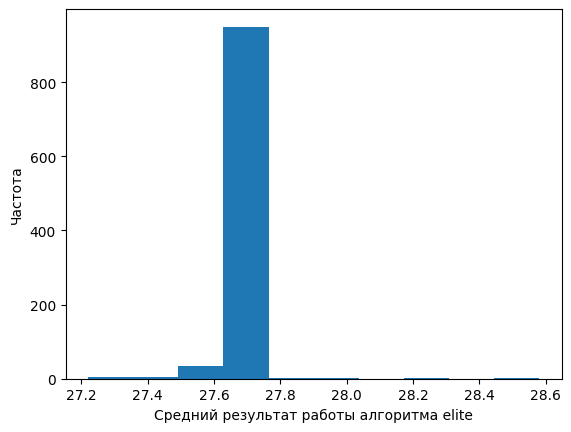

In [178]:
import matplotlib.pyplot as plt

plt.hist(mean_el)
plt.xlabel('Средний результат работы алгоритма elite')
plt.ylabel('Частота')
plt.savefig('C:\\Users\\Dmitriy\\python\\mean_el.png', dpi=600)
plt.show()

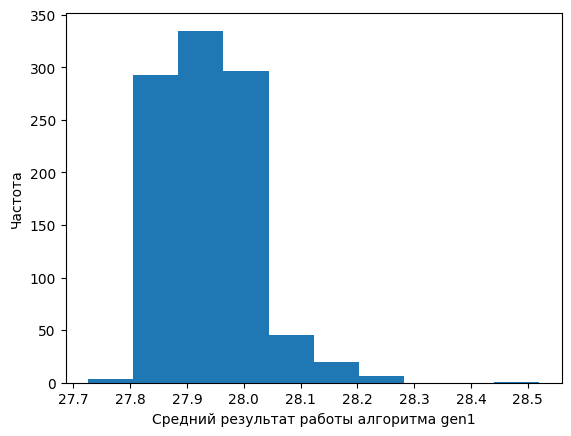

In [179]:
plt.hist(mean_gen1)
plt.xlabel('Средний результат работы алгоритма gen1')
plt.ylabel('Частота')
plt.savefig('C:\\Users\\Dmitriy\\python\\mean_gen1.png', dpi=600)
plt.show()

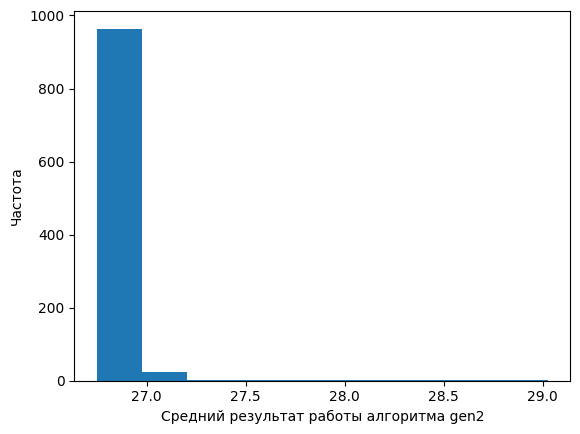

In [180]:
plt.hist(mean_gen2)
plt.xlabel('Средний результат работы алгоритма gen2')
plt.ylabel('Частота')
plt.savefig('C:\\Users\\Dmitriy\\python\\mean_gen2.png', dpi=600)
plt.show()

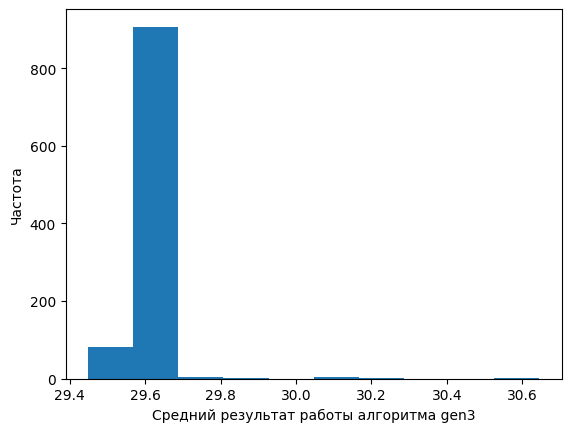

In [181]:
plt.hist(mean_gen3)
plt.xlabel('Средний результат работы алгоритма gen3')
plt.ylabel('Частота')
plt.savefig('C:\\Users\\Dmitriy\\python\\mean_gen3.png', dpi=600)
plt.show()

In [205]:
transition_matrix4 = [
    [ # - a
        
            [1, 0, 0, 0, 0, 0],
            [0.4, 0.4, 0, 0.2, 0, 0],
            [0, 0.2, 0.3, 0.5, 0, 0],
            [0, 0, 0.1, 0.4, 0.4, 0.1],
            [0, 0, 0.2, 0.1, 0.3, 0.4],
            [0.1, 0.2, 0, 0, 0, 0.7]
        
    ],
    [ # - b
         
            [1, 0, 0, 0, 0, 0],
            [0.2, 0.5, 0, 0.3, 0, 0],
            [0, 0.2, 0.3, 0.3, 0.2, 0],
            [0, 0, 0, 0.3, 0.4, 0.3],
            [0, 0, 0, 0, 0.1, 0.9],
            [0.1, 0.2, 0, 0, 0, 0.7]
         
    ],
    [ # - e
        
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
    ]
]
def normalize(v):
    sum_v = sum(v)
    for i in range(len(v)):
        v[i] /= sum_v
    return v
    
def generate_automata_class1():
    list_a = [
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0.1, 0.2, 0, 0, 0, 0.7]
    ]
    list_b = [
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0.1, 0.2, 0, 0, 0, 0.7]
    ]
    list_e = [ # - e
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ]
    
    indexex_a = [[0, 1, 3], [1, 2, 3], [2, 3, 4, 5], [2, 3, 4, 5]]
    indexex_b = [[0, 1, 3], [1, 2, 3, 4], [3, 4, 5], [4, 5]]

    parameters_vector = []
    
    for i in range(len(indexex_a)):
        for j in range(len(indexex_a[i])):
            list_a[i + 1][indexex_a[i][j]] = round(random.uniform(0, 1), 2)
            parameters_vector.append(list_a[i + 1][indexex_a[i][j]])
            
    for i in range(len(indexex_b)):
        for j in range(len(indexex_b[i])):
            list_b[i + 1][indexex_b[i][j]] = round(random.uniform(0, 1), 2)
            parameters_vector.append(list_b[i + 1][indexex_b[i][j]])
            
    for i in range(len(list_a)):
        list_a[i] = normalize(list_a[i])

    for i in range(len(list_b)):
        list_b[i] = normalize(list_b[i])

    transition_matrix = [list_a, list_b, list_e]
    automata1 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 1, ['a', 'b', 'e'], [0.1, 5, 0])
    automata2 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 2, ['a', 'b', 'e'], [0.1, 5, 0])
    automata3 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 3, ['a', 'b', 'e'], [0.1, 5, 0])
    automata4 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 4, ['a', 'b', 'e'], [0.1, 5, 0])
    
    return (union_automatas([automata1, automata2, automata3, automata4], [0.25, 0.25, 0.25, 0.25]), parameters_vector)

def generate_automata_class2():
    list_a = [
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0.1, 0.2, 0, 0, 0, 0.7]
    ]
    list_b = [
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0.1, 0.1, 0, 0, 0, 0.8]
    ]
    list_e = [ # - e
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]
    ]
    
    indexex_a = [[0, 1, 4], [1, 2, 3], [0, 1, 3, 4, 5], [2, 3, 4, 5]]
    indexex_b = [[1, 3], [1, 2, 3, 4], [1, 4, 5], [4, 5]]

    parameters_vector = []
    
    for i in range(len(indexex_a)):
        for j in range(len(indexex_a[i])):
            list_a[i + 1][indexex_a[i][j]] = round(random.uniform(0, 1), 2)
            parameters_vector.append(list_a[i + 1][indexex_a[i][j]])
            
    for i in range(len(indexex_b)):
        for j in range(len(indexex_b[i])):
            list_b[i + 1][indexex_b[i][j]] = round(random.uniform(0, 1), 2)
            parameters_vector.append(list_b[i + 1][indexex_b[i][j]])
            
    for i in range(len(list_a)):
        list_a[i] = normalize(list_a[i])

    for i in range(len(list_b)):
        list_b[i] = normalize(list_b[i])
    transition_matrix = [list_a, list_b, list_e]

    automata1 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 1, ['a', 'b', 'e'], [0.1, 5, 0])
    automata2 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 2, ['a', 'b', 'e'], [0.1, 5, 0])
    automata3 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 3, ['a', 'b', 'e'], [0.1, 5, 0])
    automata4 = Automata(transition_matrix, [0, 0, 0, 0, 0, 100], [0], 4, ['a', 'b', 'e'], [0.1, 5, 0])
    return (union_automatas([automata1, automata2, automata3, automata4], [0.25, 0.25, 0.25, 0.25]), parameters_vector)
    
automata_list = [generate_automata_class1() for i in range(1000)]

# automata_list = [generate_automata_class2() for i in range(400)]

In [210]:
### Строим векторы результатов по каждому автомату
import time

start_time = time.time()
word_length = 10
generations = 10
num_words = 10
mutation_rate = 0.1
how_many_from_old_population = 6
precision = 100
k = 0.5
crossover_group = int(num_words / 2)
precision = 150

map_results_elite = {}
map_results_gen1 = {}
map_results_gen2 = {}
map_results_gen3 = {}
map_results_exh = {}
for i in automata_list:
    map_results_elite[i[0]] = []
    map_results_gen1[i[0]] = []
    map_results_gen2[i[0]] = []
    map_results_gen3[i[0]] = []
c = 1
for automata in automata_list:
    map_results_exh[automata[0]] = exhaustive_research(automata[0], word_length)
    for i in range(precision):
        map_results_elite[automata[0]].append(elite_algorithm(automata[0], word_length, k, generations, num_words)[1])
        map_results_gen1[automata[0]].append(evolutionary(automata[0], num_words, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population)[1])
        map_results_gen2[automata[0]].append(evolutionary_vol2(automata[0], num_words, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population)[1])
        map_results_gen3[automata[0]].append(evolutionary_vol3(automata[0], population_size, word_length, list(automata[0].alphabet.keys()), generations, mutation_rate, how_many_from_old_population, crossover_group)[1])
    print(f'выполнено {c}, времени затрачено:', time.time() - start_time)
    c += 1

выполнено 1, времени затрачено: 2.696592092514038
выполнено 2, времени затрачено: 5.3240742683410645
выполнено 3, времени затрачено: 7.979492425918579
выполнено 4, времени затрачено: 10.880049228668213
выполнено 5, времени затрачено: 13.74479341506958
выполнено 6, времени затрачено: 16.513427734375
выполнено 7, времени затрачено: 19.33580780029297
выполнено 8, времени затрачено: 22.461547374725342
выполнено 9, времени затрачено: 25.247304677963257
выполнено 10, времени затрачено: 28.035380601882935
выполнено 11, времени затрачено: 30.827852249145508
выполнено 12, времени затрачено: 33.60880994796753
выполнено 13, времени затрачено: 36.43096137046814
выполнено 14, времени затрачено: 39.21277666091919
выполнено 15, времени затрачено: 41.96691942214966
выполнено 16, времени затрачено: 44.755594968795776
выполнено 17, времени затрачено: 47.56326079368591
выполнено 18, времени затрачено: 50.411277294158936
выполнено 19, времени затрачено: 53.20615887641907
выполнено 20, времени затрачено: 5

In [207]:
print(map_results_elite)

{<__main__.Automata object at 0x000002257EF44690>: [26.47024678559097, 26.380366906828474, 27.82137394642018, 24.54417286560888, 23.00497805649639, 25.7371305501573, 28.45965003340828, 22.531921073376594, 28.85358406931818, 27.82137394642018, 24.54417286560888, 25.936459753551674, 26.380366906828474, 27.82137394642018, 27.82137394642018, 21.45470842091465, 29.61570564898968, 24.54417286560888, 32.387361614048004, 25.936459753551674, 28.85358406931818, 25.936459753551674, 27.82137394642018, 27.82137394642018, 27.82137394642018, 28.85358406931818, 25.936459753551674, 29.61570564898968, 28.45965003340828, 23.641534268152366, 26.380366906828474, 26.47024678559097, 23.331974442752657, 28.85358406931818, 26.380366906828474, 21.39506761986808, 26.47024678559097, 24.112532823653307, 24.54417286560888, 23.00497805649639, 26.47024678559097, 23.00497805649639, 28.85358406931818, 24.54417286560888, 25.936459753551674, 26.380366906828474, 32.387361614048004, 23.641534268152366, 23.641534268152366, 

In [209]:
map_medians_elite = {}
map_medians_gen1 = {}
map_medians_gen2 = {}
map_medians_gen3 = {}
map_results_elite[automata_list[1][0]]

[30.57172656029637,
 35.168167071847854,
 34.69865234314679,
 31.46129422875367,
 29.225347989460133,
 31.536622973589086,
 35.168167071847854,
 31.536622973589086,
 27.187431044466027,
 29.09795478465375,
 34.69865234314679,
 31.17138292481239,
 30.57172656029637,
 35.168167071847854,
 24.700409967391607,
 35.168167071847854,
 31.46129422875367,
 34.69865234314679,
 30.57172656029637,
 35.168167071847854,
 35.168167071847854,
 27.50390695515456,
 34.69865234314679,
 35.168167071847854,
 33.129682053742584,
 27.50390695515456,
 29.09795478465375,
 35.168167071847854,
 30.57172656029637,
 33.129682053742584,
 31.46129422875367,
 31.536622973589086,
 28.37417641871117,
 34.69865234314679,
 33.129682053742584,
 34.69865234314679,
 29.783853611107354,
 28.37417641871117,
 33.129682053742584,
 33.129682053742584,
 33.129682053742584,
 31.17138292481239,
 33.619265860302775,
 35.168167071847854,
 30.57172656029637,
 29.174775248081446,
 31.17138292481239,
 35.168167071847854,
 34.69865234314

In [211]:
count_elite_more_than_gen3 = 0
for i in automata_list:
    map_medians_elite[i[0]] = statistics.median(map_results_elite[i[0]])
    map_medians_gen1[i[0]] = statistics.median(map_results_gen1[i[0]])
    map_medians_gen2[i[0]] = statistics.median(map_results_gen2[i[0]])
    map_medians_gen3[i[0]] = statistics.median(map_results_gen3[i[0]])    

In [216]:
c = 0
for i in automata_list:
    if(map_medians_elite[i[0]] <  map_medians_gen3[i[0]]):
        c += 1
print(c)

988


In [214]:
import numpy as np
import scipy.stats as stats
from itertools import combinations
from statsmodels.stats.multitest import multipletests
import pandas as pd

# num = 4
# group1 = map_results_elite[automata_list[num]]
# group2 = map_results_gen1[automata_list[num]]
# group3 = map_results_gen2[automata_list[num]]
# group4 = map_results_gen3[automata_list[num]]
def stat_test(group1, group2, group3, group4):
# Список всех групп
    groups = [group1, group2, group3, group4]
    group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
    
    # Выполнение попарного теста Манна-Уитни
    p_values = []
    comparisons = list(combinations(range(4), 2))
    for (i, j) in comparisons:
        stat, p = stats.mannwhitneyu(groups[i], groups[j], alternative='two-sided')
        p_values.append(p)
    
    # Поправка Холма
    reject, p_corrected, _, _ = multipletests(p_values, alpha=0.05, method='holm')
    
    vector_p_value = []
    for ((i, j), p, corr, r) in zip(comparisons, p_values, p_corrected, reject):
        result = "Отвергаем H0" if r else "Не отвергаем H0"
        # print(f"{group_names[i]} vs {group_names[j]}: p-value = {p:.4f}, corrected p-value = {corr:.4f} ({result})")
        vector_p_value.append(corr)
        res = [int((i <= 0.05)) for i in vector_p_value]
    return res

map_result = {}
for i in range(64):
    map_result[i] = []
length = len(automata_list)
for i in range(length):
    group1 = map_results_elite[automata_list[i][0]]
    group2 = map_results_gen1[automata_list[i][0]]
    group3 = map_results_gen2[automata_list[i][0]]
    group4 = map_results_gen3[automata_list[i][0]]
    map_result[int("".join(str(x) for x in stat_test(group1, group2, group3, group4)), 2)].append(i)

In [226]:
for i in range(64):
    print(i, ': ', map_result[i])

# 0      0      0      0    0      0 
# h1 h2  h1 h3 h1 h4  h2 h3 h2 h4 h3 h4

# нам подходят: xy1z11
bin_list = [
0b001011,
0b001111,
0b011011,
0b011111,
0b101011,
0b101111,
0b111011,
0b111111
]
new_list = [int(i) for i in bin_list]


0 :  []
1 :  [307, 369, 531, 583, 780, 840, 922, 937]
2 :  []
3 :  [41, 204, 394, 638, 659, 731, 900]
4 :  []
5 :  []
6 :  []
7 :  []
8 :  []
9 :  [112, 210, 266, 296, 512, 554, 569, 572, 607, 688, 786, 819, 842, 844, 857, 949]
10 :  [892]
11 :  [0, 1, 2, 8, 10, 13, 14, 21, 22, 24, 25, 26, 28, 30, 31, 34, 37, 38, 40, 43, 45, 49, 50, 51, 57, 60, 61, 64, 68, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 86, 88, 90, 91, 93, 94, 98, 101, 103, 104, 105, 107, 110, 111, 113, 118, 119, 120, 122, 123, 125, 126, 127, 130, 131, 133, 134, 136, 139, 140, 142, 146, 147, 149, 150, 151, 152, 154, 158, 159, 160, 161, 163, 165, 166, 167, 169, 171, 175, 176, 179, 181, 182, 189, 193, 195, 196, 198, 199, 211, 216, 220, 221, 223, 225, 227, 228, 229, 230, 231, 232, 233, 237, 238, 241, 243, 245, 246, 249, 252, 254, 256, 257, 258, 260, 262, 263, 264, 265, 268, 270, 272, 273, 275, 276, 278, 279, 280, 281, 284, 285, 287, 289, 292, 298, 302, 305, 308, 313, 316, 321, 323, 326, 329, 333, 335, 336, 339, 341, 343, 344, 345

In [274]:
list_values = []
for i in map_result.keys():
    list_values.append((bin(i), len(map_result[i])))

list_values.sort(key=lambda x: x[1], reverse=True)
print(list_values)

[('0b1011', 443), ('0b11111', 148), ('0b1111', 142), ('0b101111', 100), ('0b11011', 57), ('0b111111', 17), ('0b1001', 16), ('0b101101', 10), ('0b1', 8), ('0b11101', 8), ('0b101011', 8), ('0b11', 7), ('0b1101', 7), ('0b10001', 7), ('0b111011', 6), ('0b10011', 5), ('0b10101', 4), ('0b101001', 2), ('0b110011', 2), ('0b1010', 1), ('0b10111', 1), ('0b110001', 1), ('0b0', 0), ('0b10', 0), ('0b100', 0), ('0b101', 0), ('0b110', 0), ('0b111', 0), ('0b1000', 0), ('0b1100', 0), ('0b1110', 0), ('0b10000', 0), ('0b10010', 0), ('0b10100', 0), ('0b10110', 0), ('0b11000', 0), ('0b11001', 0), ('0b11010', 0), ('0b11100', 0), ('0b11110', 0), ('0b100000', 0), ('0b100001', 0), ('0b100010', 0), ('0b100011', 0), ('0b100100', 0), ('0b100101', 0), ('0b100110', 0), ('0b100111', 0), ('0b101000', 0), ('0b101010', 0), ('0b101100', 0), ('0b101110', 0), ('0b110000', 0), ('0b110010', 0), ('0b110100', 0), ('0b110101', 0), ('0b110110', 0), ('0b110111', 0), ('0b111000', 0), ('0b111001', 0), ('0b111010', 0), ('0b111100',

In [218]:
def diff_dimention(map):
    new_map = {}
    for i in map.keys():
        for j in map[i]:
            new_map[j] = i
    return new_map
diff_map_result = diff_dimention(map_result)

In [275]:
c = 0
list_values = []
for i in range(1000):
    if ((diff_map_result[i] in new_list)
        and (map_medians_elite[automata_list[i][0]] <  map_medians_gen3[automata_list[i][0]]) 
        and (map_medians_gen1[automata_list[i][0]] <  map_medians_gen3[automata_list[i][0]])
        and (map_medians_gen2[automata_list[i][0]] <  map_medians_gen3[automata_list[i][0]])):
        c += 1
        list_values.append(i)

len(list_values)

904

In [248]:
c = 0
for i in range(1000):
    if ((diff_map_result[i] not in new_list)
        or (map_medians_elite[automata_list[i][0]] >  map_medians_gen3[automata_list[i][0]]) 
        or (map_medians_gen1[automata_list[i][0]] >  map_medians_gen3[automata_list[i][0]])
        or (map_medians_gen2[automata_list[i][0]] >  map_medians_gen3[automata_list[i][0]])):
        c += 1
        list_values.append(i)

c

79

In [266]:
bin_list1 = [
    0b000000,
    0b000001,
    0b000010,
    0b000011,
    0b001000,
    0b001001,
    0b001010,
    0b001011,
]
new_list1 = [int(i) for i in bin_list1]

c = 0
list_values = []
for i in range(1000):
    if (diff_map_result[i] in new_list1):
        c += 1
        list_values.append(i)

len(list_values)

475

In [250]:
set1 = set(list_values)
set2 = set([i for i in range(1000)])
set2 - set1

{17,
 44,
 71,
 103,
 106,
 184,
 380,
 397,
 403,
 415,
 506,
 594,
 805,
 883,
 950,
 979,
 993}

In [256]:
for i in (set2 - set1):
    print(diff_map_result[i])

print('\n', new_list)

31
15
11
11
47
15
31
63
43
15
15
15
11
31
11
11
47

 [11, 15, 27, 31, 43, 47, 59, 63]


In [230]:
if (4 in [1, 2, 3]):
    print('GOOOL')

In [278]:
import random
import numpy as np

def k_means(vectors, k, max_iters=1000):
    # Преобразование списка векторов в массив numpy для удобства вычислений
    vectors = np.array(vectors)
    n_samples, n_features = vectors.shape
    
    # Инициализация центроидов случайным образом
    centroids = vectors[random.sample(range(n_samples), k)]
    
    # Для хранения кластеров
    clusters = {i: [] for i in range(k)}

    for _ in range(max_iters):
        # Сброс кластеров
        clusters = {i: [] for i in range(k)}
        
        # Назначение каждого вектора ближайшему центроиду
        for vector in vectors:
            distances = [np.linalg.norm(vector - centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(vector)
        print('iter: ', _)
        # Сохранение предыдущих центроидов для проверки сходимости
        previous_centroids = centroids.copy()
        
        # Обновление центроидов
        for i in range(k):
            if clusters[i]:  # Проверка на пустой кластер
                centroids[i] = np.mean(clusters[i], axis=0)
        
        # Проверка сходимости (если центроиды не изменились, завершение)
        if np.all(previous_centroids == centroids):
            break
    
    # Преобразование массивов numpy обратно в списки для удобства
    final_clusters = {i: [vector.tolist() for vector in clusters[i]] for i in clusters}
    return final_clusters

# Пример использования
vectors = []

for i in automata_list:
    vectors.append(i[1])
k = 64
result = k_means(vectors, k)
# print(result)

map_automata = {}
for i in range(len(automata_list)):
    map_automata[i] = automata_list[i][1]

for i in range(k):
    new_list_i = []
    vec_to_compare = result[i]
    for m in vec_to_compare:
        for j in range(len(automata_list)):
            if map_automata[j] == m:
                new_list_i.append(j)
    result[i] = new_list_i

for i in range(k):
    print(i, ':', result[i])


iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
0 : [16, 85, 92, 297, 313, 359, 482, 599, 672, 801, 852, 928, 948, 949]
1 : [15, 119, 270, 338, 425, 598, 642, 655, 733, 775, 805, 823, 966]
2 : [45, 48, 51, 162, 164, 167, 208, 218, 239, 277, 304, 413, 429, 517, 538, 555, 572, 657, 754, 755, 828, 830, 835, 857, 881, 906]
3 : [63, 91, 204, 253, 260, 336, 385, 506, 552, 725, 829, 977]
4 : [326, 417, 488, 544, 681, 684, 741, 778, 810, 839, 848, 914, 929, 951, 965, 973, 988]
5 : [13, 36, 55, 187, 192, 280, 324, 332, 377, 380, 473, 519, 520, 561, 576, 618, 696, 721, 763, 807, 871, 950]
6 : [374, 749, 868]
7 : [104, 432, 516, 623, 687, 772, 863]
8 : [60, 323, 325, 341, 346, 369, 445, 475, 480, 487, 504, 508, 726, 748, 766, 825, 903, 967]
9 : [240, 300, 331, 691, 788, 808, 865]
10 : [166, 274, 443, 458, 659, 669, 870, 873, 876, 913, 930]
11 : [49, 50, 100, 196, 216, 453, 527, 607, 667, 709, 811, 832, 941]
12 : [1, 11, 118, 141, 143, 165, 189, 

In [277]:
# k = 64
# map_automata = {}
# for i in range(len(automata_list)):
#     map_automata[i] = automata_list[i][1]

# for i in range(k):
#     new_list_i = []
#     vec_to_compare = result[i]
#     for m in vec_to_compare:
#         for j in range(len(automata_list)):
#             if map_automata[j] == m:
#                 new_list_i.append(j)
#     result[i] = new_list_i

# for i in range(k):
#     print(i, ':', result[i])

0 : []
1 : []
2 : []
3 : []
4 : []
5 : []
6 : []
7 : []
8 : []
9 : []
10 : []
11 : []
12 : []
13 : []
14 : []
15 : []
16 : []
17 : []
18 : []
19 : []
20 : []
21 : []
22 : []
23 : []
24 : []
25 : []
26 : []
27 : []
28 : []
29 : []
30 : []
31 : []
32 : []
33 : []
34 : []
35 : []
36 : []
37 : []
38 : []
39 : []
40 : []
41 : []
42 : []
43 : []
44 : []
45 : []
46 : []
47 : []
48 : []
49 : []
50 : []
51 : []
52 : []
53 : []
54 : []
55 : []
56 : []
57 : []
58 : []
59 : []
60 : []
61 : []
62 : []
63 : []


In [280]:
def count_invertions(map1, map2, num_automatas, k):
    count_invertions = 0
    count_in_same = 0
    count_not_in_same = 0
    map_clusters_razb1 = {}
    map_clusters_razb2 = {}
    
    for i in map1.keys():
        for j in map1[i]:
            map_clusters_razb1[j] = i

    for i in map2.keys():
        for k in map2[i]:
            map_clusters_razb2[k] = i
            
    indexes_razb = list(map_clusters_razb1.keys())

    # print(map_clusters_razb1)
    # print('\n')
    # print(map_clusters_razb2)
        # map_clusters_razb1[i]
        # map_clusters_razb2[i]
        
    for i in indexes_razb:
        for j in indexes_razb:
            if i != j:
                razb1_is_in_one = 0
                razb2_is_in_one = 0
                if (map_clusters_razb1[i] == map_clusters_razb1[j]):
                    razb1_is_in_one = 1
                if (map_clusters_razb2[i] == map_clusters_razb2[j]):
                    razb2_is_in_one = 1
                if (razb1_is_in_one == razb2_is_in_one):
                    count_invertions += 1
                if (razb1_is_in_one == razb2_is_in_one and razb2_is_in_one == 1):
                    count_in_same += 1
                if (razb1_is_in_one == razb2_is_in_one and razb2_is_in_one == 0):
                    count_not_in_same += 1
    return count_invertions / (num_automatas * num_automatas), count_in_same, count_not_in_same
count_invertions(map_result, result, 1000, 64)

    

(0.738972, 4442, 734530)

In [113]:
# def count_invertions(map1, map2, num_automatas, k):
#     count_invertions = 0

#     map_clusters_razb1 = {}
#     map_clusters_razb2 = {}
    
#     for i in map1.keys():
#         for j in map1[i]:
#             map_clusters_razb1[j] = i

#     for i in map2.keys():
#         for k in map2[i]:
#             map_clusters_razb2[k] = i
            
#     indexes_razb = list(map_clusters_razb1.keys())

#     # print(map_clusters_razb1)
#     # print('\n')
#     # print(map_clusters_razb2)
#         # map_clusters_razb1[i]
#         # map_clusters_razb2[i]
        
#     for i in range(num_automatas):
#         for j in range(i, num_automatas):
#             razb1_is_in_one = 0
#             razb2_is_in_one = 0
#             if (map_clusters_razb1[i] == map_clusters_razb1[j]):
#                 razb1_is_in_one = 1
#             if (map_clusters_razb2[i] == map_clusters_razb2[j]):
#                 razb2_is_in_one = 1
#             if (razb1_is_in_one == razb2_is_in_one):
#                 count_invertions += 1
#     return count_invertions / (num_automatas * num_automatas / 2)
# count_invertions(map_result, result, 1000, 64)

0.762054

In [281]:
map_result_copy = map_result.copy()
result_copy = result.copy()

In [284]:
for i in range(k):
    print(i, ':', map_result_copy[i])
print('\n')
for i in range(k):
    print(i, ':', result_copy[i])



0 : []
1 : [307, 369, 531, 583, 780, 840, 922, 937]
2 : []
3 : [41, 204, 394, 638, 659, 731, 900]
4 : []
5 : []
6 : []
7 : []
8 : []
9 : [112, 210, 266, 296, 512, 554, 569, 572, 607, 688, 786, 819, 842, 844, 857, 949]
10 : [892]


0 : [16, 85, 92, 297, 313, 359, 482, 599, 672, 801, 852, 928, 948, 949]
1 : [15, 119, 270, 338, 425, 598, 642, 655, 733, 775, 805, 823, 966]
2 : [45, 48, 51, 162, 164, 167, 208, 218, 239, 277, 304, 413, 429, 517, 538, 555, 572, 657, 754, 755, 828, 830, 835, 857, 881, 906]
3 : [63, 91, 204, 253, 260, 336, 385, 506, 552, 725, 829, 977]
4 : [326, 417, 488, 544, 681, 684, 741, 778, 810, 839, 848, 914, 929, 951, 965, 973, 988]
5 : [13, 36, 55, 187, 192, 280, 324, 332, 377, 380, 473, 519, 520, 561, 576, 618, 696, 721, 763, 807, 871, 950]
6 : [374, 749, 868]
7 : [104, 432, 516, 623, 687, 772, 863]
8 : [60, 323, 325, 341, 346, 369, 445, 475, 480, 487, 504, 508, 726, 748, 766, 825, 903, 967]
9 : [240, 300, 331, 691, 788, 808, 865]
10 : [166, 274, 443, 458, 659, 669, 8

In [285]:
map1 = {}
map2 = {}
for i in map_result_copy.keys():
    if (len(map_result_copy[i]) >= 1):
        map1[i] = map_result_copy[i]

print(map1.keys())
new_automata_list = []
indexes_new_automata_list = []
for i in map1.keys():
    for j in map1[i]:
        new_automata_list.append(automata_list[j])
        indexes_new_automata_list.append(j)
print(len(new_automata_list))

params_new_for_k_means = [i[1] for i in new_automata_list]


k = len(list(map1.keys()))
result_new = k_means(vectors, k)
# print(result)

map_automata = {}
for i in range(len(automata_list)):
    map_automata[i] = automata_list[i][1]

for i in range(k):
    new_list_i = []
    vec_to_compare = result_new[i]
    for m in vec_to_compare:
        for j in indexes_new_automata_list:
            if map_automata[j] == m:
                new_list_i.append(j)
    result_new[i] = new_list_i

for i in range(k):
    print(i, ':', result_new[i])





dict_keys([1, 3, 9, 10, 11, 13, 15, 17, 19, 21, 23, 27, 29, 31, 41, 43, 45, 47, 49, 51, 59, 63])
1000
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
0 : [15, 27, 42, 65, 71, 72, 97, 114, 163, 168, 191, 211, 268, 312, 317, 338, 357, 365, 465, 470, 476, 511, 522, 535, 541, 562, 581, 597, 608, 632, 680, 685, 694, 771, 809, 820, 839, 879, 889, 900, 924, 995]
1 : [4, 29, 40, 46, 56, 77, 81, 85, 153, 185, 203, 220, 235, 244, 246, 249, 265, 270, 291, 295, 350, 359, 411, 421, 423, 427, 428, 432, 436, 443, 452, 499, 514, 525, 569, 600, 605, 619, 622, 643, 651, 678, 693, 735, 754, 769, 772, 779, 787, 806, 811, 816, 821, 893, 922, 927, 929, 959, 963, 977, 981]
2 : [33, 36, 41, 78, 82, 129, 136, 205, 215, 219, 227, 266, 272, 279, 286, 299, 327, 382, 394, 402, 405, 419, 420, 430, 438, 473, 534, 537, 546, 547, 577, 583, 586, 625, 635, 672, 706, 740, 750, 788, 791, 793, 804, 807, 858, 865, 917, 933, 950]
3 : 

In [286]:
count = 0
for i in result_new.keys():
    for j in result_new[i]:
        count += 1
print(count)

1000


In [288]:
list_values = []
for i in result_new.keys():
    list_values.append((bin(i), len(result_new[i])))

list_values.sort(key=lambda x: x[1], reverse=True)
print(list_values)

[('0b1000', 64), ('0b1', 61), ('0b100', 55), ('0b10011', 51), ('0b10', 49), ('0b1110', 49), ('0b111', 48), ('0b1111', 48), ('0b10001', 47), ('0b110', 46), ('0b1010', 46), ('0b1001', 44), ('0b10000', 44), ('0b10100', 44), ('0b0', 42), ('0b101', 41), ('0b1011', 41), ('0b11', 40), ('0b10010', 40), ('0b1100', 39), ('0b1101', 31), ('0b10101', 30)]


In [287]:
count_invertions(map1, result_new, 952, 10)

(0.8003098298142787, 11886, 713438)

In [153]:
x = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 30]
x = [str(i) for i in x]
print(x)


['4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '20', '25', '30']


In [ ]:
count_invertions_64 = 0.76054 , 4030 (in the same), 756024 (in different)

count_invertions_10 [count_automatas >= 8] = 0.6965, 22920 (in the same), 608378 (in different)